#📌 Extracción

In [153]:
import pandas as pd

In [154]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

#🔧 Transformación

In [155]:
datos = pd.read_json(url)
datos.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [156]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [157]:
datos['customerID'].sample(10)

,customerID
805,1137-DGOWI
1181,1686-STUHN
1938,2740-JFBOK
1012,1423-BMPBQ
5019,6861-XWTWQ
4630,6345-HOVES
5177,7065-YUNRY
3513,4837-QUSFT
5060,6910-HADCM
6320,8696-JKZNU


In [158]:
import numpy as np

In [159]:
datos[['customerID','Churn']] = datos[['customerID','Churn']].astype(str)
datos[['customerID','Churn']] = datos[['customerID','Churn']].applymap(lambda x: x.upper().strip())
datos[['customerID','Churn']] = datos[['customerID','Churn']].replace('', np.nan)

/tmp/ipython-input-159-2567446011.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos[['customerID','Churn']] = datos[['customerID','Churn']].applymap(lambda x: x.upper().strip())


In [160]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [161]:
customer_df[['gender','Partner','Dependents']] = customer_df[['gender','Partner','Dependents']].applymap(lambda x: x.upper().strip())
customer_df[['gender','Partner','Dependents']] = customer_df[['gender','Partner','Dependents']].astype(str)
customer_df[['SeniorCitizen','tenure']] = customer_df[['SeniorCitizen','tenure']].astype(np.int64)
customer_df

/tmp/ipython-input-161-1732436861.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_df[['gender','Partner','Dependents']] = customer_df[['gender','Partner','Dependents']].applymap(lambda x: x.upper().strip())


,gender,SeniorCitizen,Partner,Dependents,tenure
0,FEMALE,0,YES,YES,9
1,MALE,0,NO,NO,9
2,MALE,0,NO,NO,4
3,MALE,1,YES,NO,13
4,FEMALE,1,YES,NO,3
...,...,...,...,...,...
7262,FEMALE,0,NO,NO,13
7263,MALE,0,YES,NO,22
7264,MALE,0,NO,NO,2
7265,MALE,0,YES,YES,67


In [162]:
phone_df[['PhoneService','MultipleLines']] = phone_df[['PhoneService','MultipleLines']].applymap(lambda x: x.upper().strip())
phone_df[['PhoneService','MultipleLines']] = phone_df[['PhoneService','MultipleLines']].astype(str)
phone_df

/tmp/ipython-input-162-3511057666.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  phone_df[['PhoneService','MultipleLines']] = phone_df[['PhoneService','MultipleLines']].applymap(lambda x: x.upper().strip())


,PhoneService,MultipleLines
0,YES,NO
1,YES,YES
2,YES,NO
3,YES,NO
4,YES,NO
...,...,...
7262,YES,NO
7263,YES,YES
7264,YES,NO
7265,YES,NO


In [163]:
internet_df[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']] \
          = internet_df[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]\
          .applymap(lambda x: x.upper().strip())
internet_df

/tmp/ipython-input-163-2450117841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: x.upper().strip())


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,NO,YES,NO,YES,YES,NO
1,DSL,NO,NO,NO,NO,NO,YES
2,FIBER OPTIC,NO,NO,YES,NO,NO,NO
3,FIBER OPTIC,NO,YES,YES,NO,YES,YES
4,FIBER OPTIC,NO,NO,NO,YES,YES,NO
...,...,...,...,...,...,...,...
7262,DSL,YES,NO,NO,YES,NO,NO
7263,FIBER OPTIC,NO,NO,NO,NO,NO,YES
7264,DSL,NO,YES,NO,NO,NO,NO
7265,DSL,YES,NO,YES,YES,NO,YES


In [164]:
account_df[['Contract','PaymentMethod','PaperlessBilling']] = account_df[['Contract','PaymentMethod','PaperlessBilling']].applymap(lambda x: x.upper().strip())
account_df


/tmp/ipython-input-164-3989132188.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  account_df[['Contract','PaymentMethod','PaperlessBilling']] = account_df[['Contract','PaymentMethod','PaperlessBilling']].applymap(lambda x: x.upper().strip())


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,ONE YEAR,YES,MAILED CHECK,65.60,593.3
1,MONTH-TO-MONTH,NO,MAILED CHECK,59.90,542.4
2,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,73.90,280.85
3,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,98.00,1237.85
4,MONTH-TO-MONTH,YES,MAILED CHECK,83.90,267.4
...,...,...,...,...,...
7262,ONE YEAR,NO,MAILED CHECK,55.15,742.9
7263,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,85.10,1873.7
7264,MONTH-TO-MONTH,YES,MAILED CHECK,50.30,92.75
7265,TWO YEAR,NO,MAILED CHECK,67.85,4627.65


In [165]:
account_df['Charges.Total'] = account_df['Charges.Total'].astype(str).str.strip() #convertimos a string y eliminamos espacios
#account_df['Charges.Total'] = account_df['Charges.Total'].apply(lambda x: x.strip())


In [166]:
account_df['Charges.Total'] = account_df['Charges.Total'].replace('', np.nan)

In [167]:
#account_df['Charges.Total'] = account_df['Charges.Total'].str.replace(r'["\']','', regex=True)
#account_df['Charges.Total'] = account_df['Charges.Total'].str.replace(r'^(\d+)$',r'\1.0',regex=True) #aumentamos .0 a los numeros sin decimales
#account_df['Charges.Total'] = account_df['Charges.Total'].str.replace(r'^(\d+\.\d)$',r'\g<1>0',regex=True) #aumentamos otro decimal a los números con un decimal
#account_df['Charges.Total'] = account_df['Charges.Total'].str.replace('','0.0', regex=True)

In [168]:
account_df['Charges.Total'] = account_df['Charges.Total'].astype(np.float64)

In [169]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [170]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,NO,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,NO,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,YES,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,YES,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,YES,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,NO,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,YES,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,NO,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,NO,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [171]:
datos = pd.concat(
    [
        datos[['customerID', 'Churn']].reset_index(drop=True),
        customer_df.reset_index(drop=True),
        phone_df.reset_index(drop=True),
        internet_df.reset_index(drop=True),
        account_df.reset_index(drop=True)
    ],
    axis=1
)

In [172]:
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2155,3012-VFFMN,NO,FEMALE,0,YES,YES,7,YES,NO,NO,...,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,MONTH-TO-MONTH,NO,MAILED CHECK,20.65,158.95
3470,4806-HIPDW,YES,FEMALE,0,YES,NO,1,YES,NO,FIBER OPTIC,...,NO,NO,NO,NO,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,68.95,68.95
2844,3946-MHCZW,YES,MALE,0,NO,NO,1,YES,NO,DSL,...,NO,YES,NO,NO,NO,MONTH-TO-MONTH,NO,MAILED CHECK,50.90,50.90
6876,9489-DEDVP,NO,FEMALE,0,YES,YES,70,YES,YES,DSL,...,YES,NO,NO,YES,NO,TWO YEAR,YES,CREDIT CARD (AUTOMATIC),69.20,4872.35
6629,9112-WSNPU,NO,FEMALE,1,NO,NO,35,YES,NO,FIBER OPTIC,...,NO,NO,NO,NO,NO,MONTH-TO-MONTH,NO,ELECTRONIC CHECK,70.55,2419.00
4907,6710-HSJRD,NO,MALE,0,YES,NO,61,YES,YES,FIBER OPTIC,...,YES,YES,YES,YES,YES,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,114.10,7132.15
4266,5868-CZJDR,YES,MALE,0,NO,YES,1,NO,NO PHONE SERVICE,DSL,...,YES,NO,NO,NO,NO,MONTH-TO-MONTH,YES,MAILED CHECK,31.35,31.35
2773,3842-IYKUE,YES,FEMALE,0,NO,NO,35,YES,YES,FIBER OPTIC,...,YES,NO,YES,NO,NO,MONTH-TO-MONTH,NO,CREDIT CARD (AUTOMATIC),85.30,2917.50
848,1206-EHBDD,NO,FEMALE,0,YES,NO,56,YES,NO,FIBER OPTIC,...,NO,YES,NO,NO,NO,TWO YEAR,NO,BANK TRANSFER (AUTOMATIC),80.30,4513.65
1226,1754-GKYPY,NO,MALE,1,YES,NO,22,YES,NO,FIBER OPTIC,...,NO,NO,NO,YES,YES,MONTH-TO-MONTH,YES,BANK TRANSFER (AUTOMATIC),89.75,1938.90


In [173]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [174]:
#crear columna Cuentas_Diarias
dataF=datos
dataF['Cuentas_Diarias'] = (datos['Charges.Monthly'] / 30).round(2)

In [175]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

In [176]:
#análisis descriptivo
dataF.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157292
std,0.369074,24.571773,30.129572,2268.632997,1.004407
min,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.425000,400.225000,1.180000
50%,0.000000,29.000000,70.300000,1391.000000,2.340000
75%,0.000000,55.000000,89.875000,3785.300000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [177]:
dataF.sample()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
2480,3460-TJBWI,NO,MALE,0,YES,YES,24,YES,YES,NO,...,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,TWO YEAR,NO,MAILED CHECK,24.2,609.05,0.81


In [178]:
#datosP.set_index('Churn',inplace=True)

In [179]:
import matplotlib.pyplot as plt

In [180]:
# devuelve un array con cada valor distinto (incluye NaN si lo hay)
valores_unicos = dataF['Churn'].unique()
print(valores_unicos)


['NO' 'YES' nan]


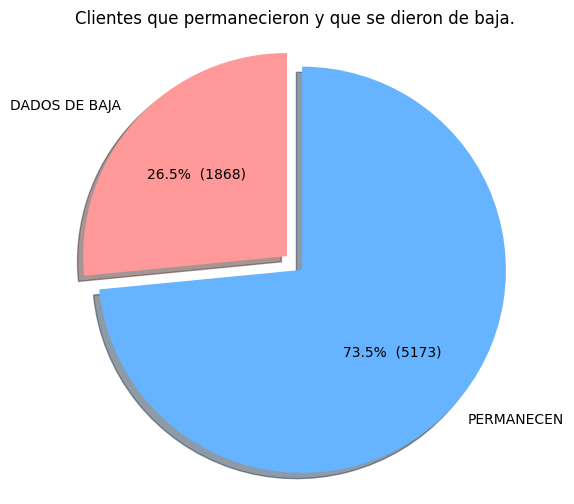

In [181]:
#Distribución de evasión
# 1) Cuenta cuántos de cada uno
counts = dataF['Churn'].value_counts().reindex(['YES','NO']).fillna(0)

# 2) Define etiquetas y colores (opcional)
labels = ['DADOS DE BAJA','PERMANECEN']
colors = ['#ff9999','#66b3ff','#99ff99']

# 3) Dibuja la torta
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%  ({int(p*sum(counts.values)/100)})',
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05),  # ligero “explode” en cada porción
    shadow=True
)
plt.title('Clientes que permanecieron y que se dieron de baja.')
plt.axis('equal')   # círculo perfecto
plt.show()


### **Recuento de evasión por variables categóricas**
Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [182]:
import sqlalchemy
from sqlalchemy import create_engine,MetaData,Table,inspect,text
engine = create_engine('sqlite:///:memory:')

In [183]:
dataF.to_sql('data_genero',engine,index=False)

7267

In [184]:
inspector = inspect(engine)
print(inspector.get_table_names())

['data_genero']


In [185]:
query = 'SELECT * FROM data_genero WHERE Churn = "YES"'

In [186]:
dataG=pd.read_sql(sql=text(query),con=engine.connect())

In [187]:
dataG

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0004-TLHLJ,YES,MALE,0,NO,NO,4,YES,NO,FIBER OPTIC,...,YES,NO,NO,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,73.90,280.85,2.46
1,0011-IGKFF,YES,MALE,1,YES,NO,13,YES,NO,FIBER OPTIC,...,YES,NO,YES,YES,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,98.00,1237.85,3.27
2,0013-EXCHZ,YES,FEMALE,1,YES,NO,3,YES,NO,FIBER OPTIC,...,NO,YES,YES,NO,MONTH-TO-MONTH,YES,MAILED CHECK,83.90,267.40,2.80
3,0022-TCJCI,YES,MALE,1,NO,NO,45,YES,NO,DSL,...,YES,NO,NO,YES,ONE YEAR,NO,CREDIT CARD (AUTOMATIC),62.70,2791.50,2.09
4,0023-HGHWL,YES,MALE,1,NO,NO,1,NO,NO PHONE SERVICE,DSL,...,NO,NO,NO,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,9961-JBNMK,YES,MALE,1,NO,NO,21,YES,NO,FIBER OPTIC,...,YES,NO,YES,YES,MONTH-TO-MONTH,YES,BANK TRANSFER (AUTOMATIC),96.80,2030.30,3.23
1865,9965-YOKZB,YES,MALE,1,NO,NO,9,YES,YES,FIBER OPTIC,...,NO,NO,NO,YES,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,83.85,790.15,2.80
1866,9985-MWVIX,YES,FEMALE,0,NO,NO,1,YES,NO,FIBER OPTIC,...,NO,NO,NO,NO,MONTH-TO-MONTH,YES,MAILED CHECK,70.15,70.15,2.34
1867,9986-BONCE,YES,FEMALE,0,NO,NO,4,YES,NO,NO,...,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,MONTH-TO-MONTH,NO,BANK TRANSFER (AUTOMATIC),20.95,85.50,0.70


In [188]:
valores_unicos = dataG['Contract'].unique()
print(valores_unicos)

['MONTH-TO-MONTH' 'ONE YEAR' 'TWO YEAR']


In [189]:
counts = dataG['Contract'].value_counts().sort_index()
print(counts)

Contract
MONTH-TO-MONTH    1655
ONE YEAR           166
TWO YEAR            48
Name: count, dtype: int64


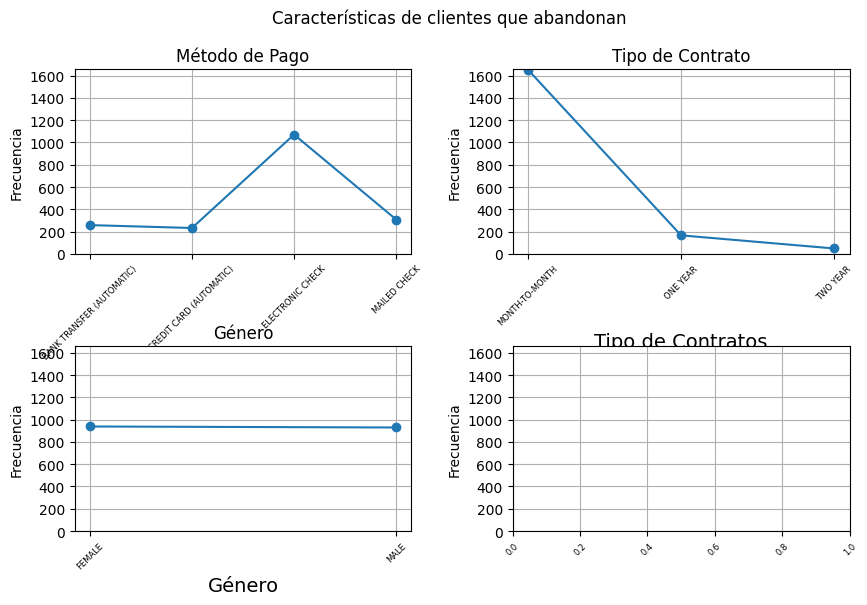

In [190]:
# Supongamos que dataG es tu DataFrame y “PaymentMethod” tu columna
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Características de clientes que abandonan')

# 1) Prepara los datos
counts = dataG['PaymentMethod'].value_counts().sort_index()
countsC = dataG['Contract'].value_counts().sort_index()
countsG = dataG['gender'].value_counts().sort_index()

# 2) Dibuja en el subplot [0,0]
axs[0, 0].plot(counts.index, counts.values, marker='o', linestyle='-')
axs[0, 0].set_title('Método de Pago')
axs[0, 1].plot(countsC.index, countsC.values, marker='o', linestyle='-')
axs[0, 1].set_title('Tipo de Contrato')
axs[1, 0].plot(countsG.index, countsG.values, marker='o', linestyle='-')
axs[1, 0].set_title('Género')

axs[0, 0].set_xlabel('Método de Pago',fontsize=14)
axs[0, 1].set_xlabel('Tipo de Contratos',fontsize=14)
axs[1, 0].set_xlabel('Género',fontsize=14)
#axs[0, 0].set_ylabel('Frecuencia')

for axs in axs.flat:
  axs.yaxis.set_major_locator(plt.MultipleLocator(200))
  axs.set_ylabel('Frecuencia')
  axs.tick_params(axis='x', rotation=45)
  axs.grid()
  axs.xaxis.set_tick_params(labelsize=6)
  axs.set_ylim(0, 1660)

plt.show()


### **Conteo de evasión por variables numéricas**
En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [195]:
#tenure Charges.Total

query = 'SELECT * FROM data_genero WHERE Churn = "YES"'
dataG = pd.read_sql(sql=text(query),con=engine.connect())


In [196]:
dataG.sample()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
761,4030-VPZBD,YES,FEMALE,0,NO,NO,2,NO,NO PHONE SERVICE,DSL,...,NO,YES,NO,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,30.9,59.05,1.03


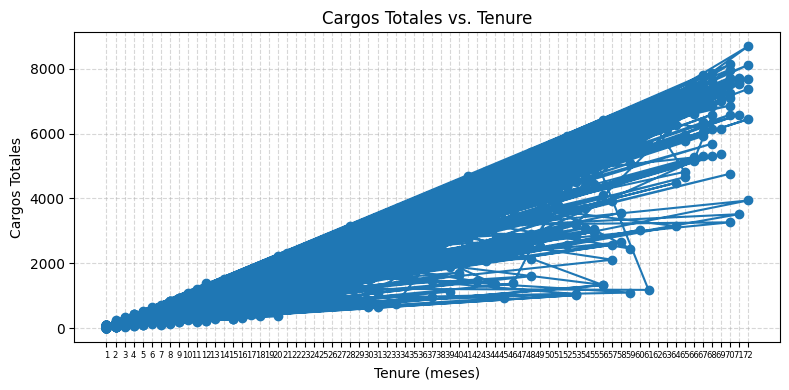

In [206]:
# Prepara la figura antes de plotear
fig, ax = plt.subplots (figsize=(8, 4))

# Dibuja la línea con marcador
ax.plot(
    dataG['tenure'],
    dataG['Charges.Total'],
    marker='o',
    linestyle='-',
    color='tab:blue'
)

# (Opcional) si quieres ticks sólo en los valores de tenure existentes
plt.xticks(sorted(dataG['tenure'].unique()))
ax.xaxis.set_tick_params(labelsize=6)

# Títulos y etiquetas coherentes con los ejes
plt.title('Cargos Totales vs. Tenure de clientes que cancelaron')
plt.xlabel('Tenure (meses)')
plt.ylabel('Cargos Totales')


# Cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Muestra la gráfica
plt.tight_layout()
plt.show()


In [ ]:
#género, tipo de contrato, método de pago
#gender  Contract	 PaymentMethod

plt.bar(dataG['gender'],dataF['gender'])

#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀